In [1]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading the breast cancer data set
diabetes_data = load_breast_cancer()

# Creating independent and dependent variables
X = diabetes_data.data
y = diabetes_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


In [2]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315


Text(33.22222222222222, 0.5, 'Truth')

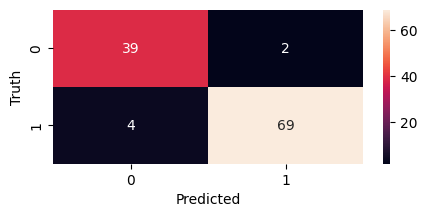

In [3]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
# confusion_matrix funnction a matrix containing the summary of predictions
cm = confusion_matrix(y_test, predictions)


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,2))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# plot_confusion_matrix function is used to visualize the confusion matrix
# plot_confusion_matrix(classifier, X_test, y_test)
# plt.show()

In [4]:
# Importing all necessary libraries
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [5]:
# Calculating the recall score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")
print("\n \t\t\tClassification Report")
print(classification_report(y_test,predictions))

Precision Score of the classifier is: 0.971830985915493
Recall Score of the classifier is: 0.9452054794520548
F1 Score of the classifier is: 0.9583333333333334

 			Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



AUC for our classifier is: 0.9769462078182426


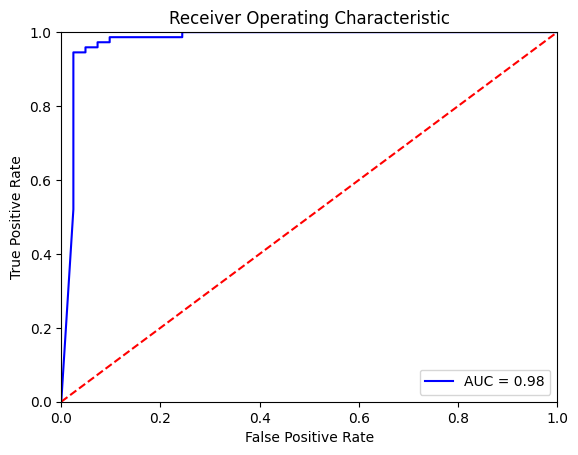

In [6]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
import pandas as pd
df = pd.read_csv('Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
df = df.drop(['No'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
X = df.iloc[:,0:6]
Y = df.iloc[:,-1]
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [11]:
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
# split data into train and test sets
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((331, 6), (331,), (83, 6), (83,))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Initializing the model and fitting the model with train data
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
# Generating predictions over test data
predictions = model.predict(X_test)
# Evaluating the model using MAE Evaluation Metric
print(mean_absolute_error(Y_test, predictions))

5.305355690074184


In [15]:
# Importing all necessary libraries
import numpy as np
from sklearn.metrics import mean_squared_error
# Defining our own MSE function
def own_mean_squared_error(actual, predictions):
    return ((predictions - actual) ** 2).mean()

# Evaluating the model using MSE Evaluation Metric
print("Mean Sqaured Error: " , mean_squared_error(Y_test, predictions))
print("Own Mean Squared Error: " , own_mean_squared_error(Y_test, predictions))

Mean Sqaured Error:  53.505619124504506
Own Mean Squared Error:  53.505619124504506


In [16]:
# Importing all necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Defining RMSE function
def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

# Generating predictions over test data
predictions = model.predict(X_test)
# Evaluating the model using RMSE Evaluation Metric
print("Root Mean Squared Error: " , root_mean_squared_error(Y_test, predictions))

Root Mean Squared Error:  7.314753524521828


In [17]:
from sklearn.metrics import r2_score

# Evaluating the model using R² Evaluation Metric
print("R² Evaluation Metric: " , r2_score(Y_test, predictions))

R² Evaluation Metric:  0.6810580555095801


In [18]:
# Defining the adjusted R² function
def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2

# Evaluating the model using Adjusted R² Evaluation Metric
num_samples = X_test.shape[0]
num_predictors = X_test.shape[1]
print("R² Evaluation Metric: " , adjusted_r2_score(Y_test, predictions, num_predictors, num_samples))

R² Evaluation Metric:  0.6558784283129679
